In [44]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('future.no_silent_downcasting', True)

In [2]:
# Read data
df_calendar = pd.read_csv('./data/calendar.csv')
df_reviews = pd.read_csv('./data/reviews.csv')
df_listings = pd.read_csv('./data/listings.csv')

## 1. Business Understanding
The goal of this analysis is to offer insights into the Boston short-term rental market which will benefit stakeholders including city planners, owners, travelers, and policymakers.

## 2. Data Understanding
A general overview and analysis of the data provided in the spreadsheets.

#### Calendar CSV:

In [3]:
print(df_calendar.shape)
pd.concat([df_calendar.head(), df_calendar.tail()])

(1308890, 4)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN
1308889,14504422,2016-09-06,f,NaN


In [4]:
# Check if there are values in the price column
df_calendar[df_calendar['price'].notnull()].head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,$65.00
366,3075044,2017-08-21,t,$65.00
367,3075044,2017-08-20,t,$65.00
368,3075044,2017-08-19,t,$75.00
369,3075044,2017-08-18,t,$75.00


In [5]:
df_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

**Notes:** The calendar spreadsheet appears to keep a running record of the dates each listing was available and the price they were listed for.

#### Reviews CSV:

In [6]:
print(df_reviews.shape)
pd.concat([df_reviews.head(), df_reviews.tail()])

(68275, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...
68274,7462268,98550693,2016-08-31,90128094,Arianna,The room itself and the aprtment were very cle...


In [7]:
df_reviews.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

**Notes:** The reviews spreadsheet contains metadata for each review per listing (reviewer_name, date, comments, etc)

#### Listings CSV:

In [8]:
print(df_listings.shape)
df_listings.head()

(3585, 95)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [9]:
df_listings.info(verbose=True)
df_listings.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 95, dtype: object

In [10]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


**Notes:** listings contains aggregated information, including host info, listing descriptions, property types and review scores. 

## Iteration: Business Understanding
Now that I've reviewed the data available, I'd like to pose five questions regarding this information...
1. In what months do rental prices spike the most?
2. Are renters generally satisfied with the accommodations in Boston?
3. What neighborhoods are the most popular?
4. What is the average price for each neighbourhood?
5. Is the amount of short-term rental bookings increasing or declining?

With those questions in mind, we can ignore the reviews spreadsheet since the majority of the information that is needed is either in the calendar or listings CSV's.

## 3. Data Preperation

In [11]:
# Check for rows missing all values
calendar_missing_count = len((df_calendar[df_calendar.isna().all(axis=1)]))
listings_missing_count = len((df_listings[df_listings.isna().all(axis=1)]))

calendar_missing_count, listings_missing_count

(0, 0)

In [12]:
# Check for duplicates
cal_duplicates = df_calendar.duplicated()
listings_duplicates = df_listings.duplicated()

cal_duplicates.sum(), listings_duplicates.sum()

(365, 0)

In [13]:
# Validate calendar duplicates
duplicated_rows = df_calendar[cal_duplicates]
duplicated_rows # The rows returned aren't duplicates, don't drop these.

,listing_id,date,available,price
748468,12898806,2017-06-15,f,NaN
748469,12898806,2017-06-14,f,NaN
748470,12898806,2017-06-13,f,NaN
748471,12898806,2017-06-12,f,NaN
748472,12898806,2017-06-11,f,NaN
...,...,...,...,...
748975,12898806,2016-12-17,f,NaN
748976,12898806,2016-12-16,f,NaN
748977,12898806,2016-12-15,f,NaN
748978,12898806,2016-12-14,f,NaN


In [14]:
# Find columns where values are all the same
# From the previous evaluation the reviews and calendar CSV's look okay but we'll take a closer look at the listings file
df_listings.info(verbose=True)
df_listings.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [15]:
all_same_values = df_listings.apply(lambda x: x.nunique() == 1)

for column, result in all_same_values.items():
    if result:
        print(f"All values in column '{column}' are the same.")

All values in column 'scrape_id' are the same.
All values in column 'last_scraped' are the same.
All values in column 'experiences_offered' are the same.
All values in column 'state' are the same.
All values in column 'country_code' are the same.
All values in column 'country' are the same.
All values in column 'calendar_last_scraped' are the same.
All values in column 'requires_license' are the same.


In [16]:
# Grab the columns with all the same values
columns_to_drop = (all_same_values[all_same_values == True]).index
columns_to_drop

Index(['scrape_id', 'last_scraped', 'experiences_offered', 'state',
       'country_code', 'country', 'calendar_last_scraped', 'requires_license'],
      dtype='object')

In [17]:
# The columns listed above can be safely dropped
original_col_count = df_listings.shape[1]
df_listings.drop(columns=columns_to_drop, inplace=True)
print('Columns dropped: ', original_col_count - df_listings.shape[1])

Columns dropped:  8


#### Drop columns that aren't relevant to the questions we're asking

1. **In what months do rental prices spike the most?**
    - Most of this can be derived from the calendar CSV, we'll keep all the columns in this dataframe

In [18]:
df_calendar.columns.tolist()

['listing_id', 'date', 'available', 'price']

2. Are renters generally satisfied with the accommodations in Boston?
3. What neighborhoods are the most popular?
4. What is the average price for each neighbourhood?
5. Is the amount of short-term rental bookings increasing or declining?',

These can be derived from the listings CSV

Columns needed:
- 'id',
- 'neighbourhood',
- 'price',
- 'number_of_reviews',
- 'review_scores_rating',
- 'review_scores_accuracy',
- 'review_scores_cleanliness',
- 'review_scores_checkin',
- 'review_scores_communication',
- 'review_scores_location',
- 'review_scores_value',
- 'reviews_per_month',

In [19]:
# Create a new subset of columns needed from the listings CSV
print(df_listings.shape)
columns_to_keep = [
     'id',
     'street',
     'neighbourhood',
     'price',
     'number_of_reviews',
     'first_review',
     'review_scores_rating',
     'review_scores_accuracy',
     'review_scores_cleanliness',
     'review_scores_checkin',
     'review_scores_communication',
     'review_scores_location',
     'review_scores_value',
     'reviews_per_month'
]
df_listings_subset = df_listings[columns_to_keep]
df_listings_subset.shape

(3585, 87)


(3585, 14)

In [20]:
df_listings_subset.head()

,id,street,neighbourhood,price,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,12147973,"Birch Street, Boston, MA 02131, United States",Roslindale,$250.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,$65.00,36,2014-06-01,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,$65.00,41,2009-07-19,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
3,1436513,"Boston, MA, United States",NaN,$75.00,1,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1.00
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,$79.00,29,2015-08-18,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25


In [21]:
# Let's review listings with more than 5 reviews. The more reviews, the more reliable our reviews & ratings data.
print(df_listings_subset.shape)
df_listings_dropped_low_reviews = df_listings_subset[df_listings_subset['number_of_reviews'] > 5]
df_listings_dropped_low_reviews.shape

(3585, 14)


(1758, 14)

In [22]:
df_listings_dropped_low_reviews.head()

,id,street,neighbourhood,price,number_of_reviews,first_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
1,3075044,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,$65.00,36,2014-06-01,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1.30
2,6976,"Ardale St., Boston, MA 02131, United States",Roslindale,$65.00,41,2009-07-19,98.0,10.0,9.0,10.0,10.0,9.0,10.0,0.47
4,7651065,"Durnell Avenue, Boston, MA 02131, United States",Roslindale,$79.00,29,2015-08-18,99.0,10.0,10.0,10.0,10.0,9.0,10.0,2.25
5,12386020,"Walter Street, Boston, MA 02131, United States",Roslindale,$75.00,8,2016-04-20,100.0,10.0,10.0,10.0,10.0,9.0,10.0,1.70
6,5706985,"Kittredge Street, Boston, MA 02131, United States",NaN,$100.00,57,2015-07-08,90.0,10.0,10.0,10.0,10.0,9.0,9.0,4.00


In [23]:
# Check the listings columns for missing data
df_listings_dropped_low_reviews.isna().mean().round(4) * 100

id                              0.00
street                          0.00
neighbourhood                  13.31
price                           0.00
number_of_reviews               0.00
first_review                    0.00
review_scores_rating            0.00
review_scores_accuracy          0.00
review_scores_cleanliness       0.00
review_scores_checkin           0.00
review_scores_communication     0.00
review_scores_location          0.00
review_scores_value             0.00
reviews_per_month               0.00
dtype: float64

In [24]:
# Drop the rows with missing neighbourhoods. These values are important for question 2.
df_listings_cleaned = df_listings_dropped_low_reviews.dropna(subset=['neighbourhood'])

In [25]:
# Check again
df_listings_cleaned.isna().mean().round(4) * 100
df_listings_cleaned.shape

(1524, 14)

In [26]:
# Check the calendar columns for missing data
df_calendar.isna().mean().round(4) * 100

listing_id     0.00
date           0.00
available      0.00
price         50.87
dtype: float64

In [27]:
df_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [28]:
# Drop the NaN values from calendar
print(df_calendar.shape)
df_calender_drop_nan = df_calendar[df_calendar['price'].isna() == False]
df_calender_drop_nan.shape

(1308890, 4)


(643037, 4)

In [29]:
df_calender_drop_nan.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [30]:
# Convert the date to a datetime
df_calender_drop_nan['date'] = pd.to_datetime(df_calender_drop_nan['date'])
df_calender_drop_nan.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [31]:
# Convert the price to a decimal
def convert_to_decimal(price_str):
    cleaned_price_str = price_str.replace('$', '').replace(',', '')
    return Decimal(cleaned_price_str)

df_calender_drop_nan.loc[:, 'price'] = df_calender_drop_nan['price'].apply(convert_to_decimal)

In [32]:
df_calender_drop_nan.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                 object
dtype: object

In [33]:
# Extract the month from the 'date' column
df_calender_drop_nan['month'] = df_calender_drop_nan['date'].dt.to_period('M')
df_calendar_with_month = df_calender_drop_nan.copy()

In [34]:
cal_cols_to_keep = ['listing_id', 'price', 'month']
df_calendar_cleaned = df_calendar_with_month[cal_cols_to_keep]

In [35]:
df_calendar_cleaned.head()

,listing_id,price,month
365,3075044,65.00,2017-08
366,3075044,65.00,2017-08
367,3075044,65.00,2017-08
368,3075044,75.00,2017-08
369,3075044,75.00,2017-08


## 4.Modeling & Evaluating

#### 1. In what months do rental prices spike the most?

In [36]:
# Find the average price per listing
df_calendar_grouped = df_calendar_cleaned.groupby(['listing_id', 'month'])['price'].mean().reset_index()
df_calendar_grouped.head()

,listing_id,month,price
0,3353,2016-12,32.0
1,3353,2017-01,32.612903
2,3353,2017-02,33.535714
3,3353,2017-03,35.354839
4,3353,2017-04,36.0


In [37]:
# Find the average price per month
df_grouped_month_price = df_calendar_grouped.groupby(['month'])['price'].mean().round(2).reset_index()
df_grouped_month_price.head()

,month,price
0,2016-09,214.863927
1,2016-10,217.245658
2,2016-11,198.152463
3,2016-12,185.214545
4,2017-01,183.296738


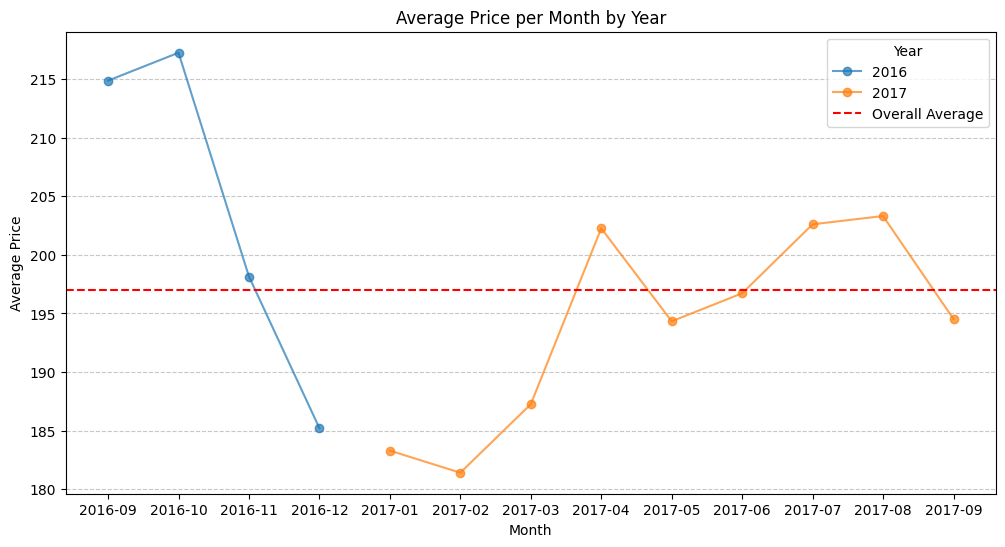

In [38]:
df_grouped_month_price['month'] = pd.to_datetime(df_grouped_month_price['month'].astype(str)).dt.to_period('M')
df_grouped_month_price['year'] = df_grouped_month_price['month'].dt.to_timestamp().dt.year  # Extracting the year

# Create a DataFrame with all possible months in the range
all_months = pd.period_range(start=df_grouped_month_price['month'].min(), end=df_grouped_month_price['month'].max(), freq='M')
all_months_df = pd.DataFrame({'month': all_months})

# Merge with the original DataFrame to fill missing months with NaN
merged_df = pd.merge(all_months_df, df_grouped_month_price, on='month', how='left')

# Fill NaN values with the overall average and set the data type
average_price_overall = df_grouped_month_price['price'].mean()
merged_df['price'] = merged_df['price'].fillna(average_price_overall).astype(df_grouped_month_price['price'].dtype)

# Convert 'month' to string representation
merged_df['month_str'] = merged_df['month'].astype(str)

# Plotting as a line graph with dots (markers) for each year
plt.figure(figsize=(12, 6))
for year in merged_df['year'].unique():
    data_year = merged_df[merged_df['year'] == year]
    plt.plot(data_year['month_str'], data_year['price'], marker='o', label=str(year), alpha=0.7)

# Plotting the overall average price as a horizontal line
plt.axhline(y=average_price_overall, color='r', linestyle='--', label='Overall Average')

plt.title('Average Price per Month by Year')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Findings for questions 1
*Q*: In what months do rental prices spike the most?
- From this graph we can see that the price spikes above the average in the spring and late summer months.
- Additionally we can see that prices plummet in winter months between November and April.
- Additionally this graph suggests that prices and demand for short term rentals may have been much higher in late 2016 than 2017

#### 2. Are renters generally satisfied with the accommodations in Boston?

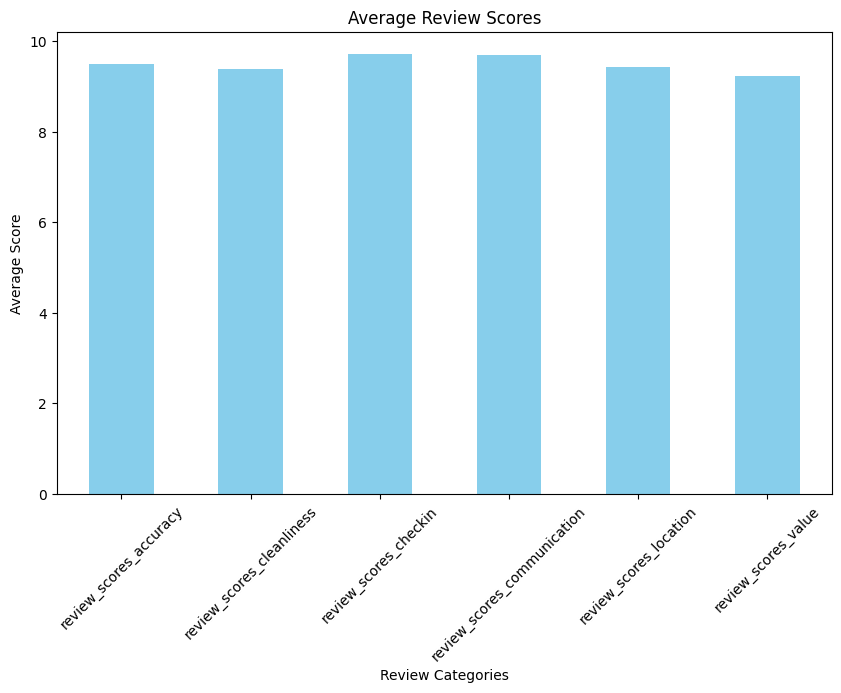

In [39]:
# Calculate the mean for each column
average_scores = df_listings_cleaned[['review_scores_accuracy', 'review_scores_cleanliness',
                                      'review_scores_checkin', 'review_scores_communication',
                                      'review_scores_location', 'review_scores_value']].mean()

# Plot the average scores
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar', color='skyblue')
plt.title('Average Review Scores')
plt.xlabel('Review Categories')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

## Findings for question 2
Q: Are renters generally satisfied with the accommodations in Boston?
- This graph suggests that reviewers are highly satisfied with their rental experiences across all review scores.

#### 3. What neighborhoods are the most popular?

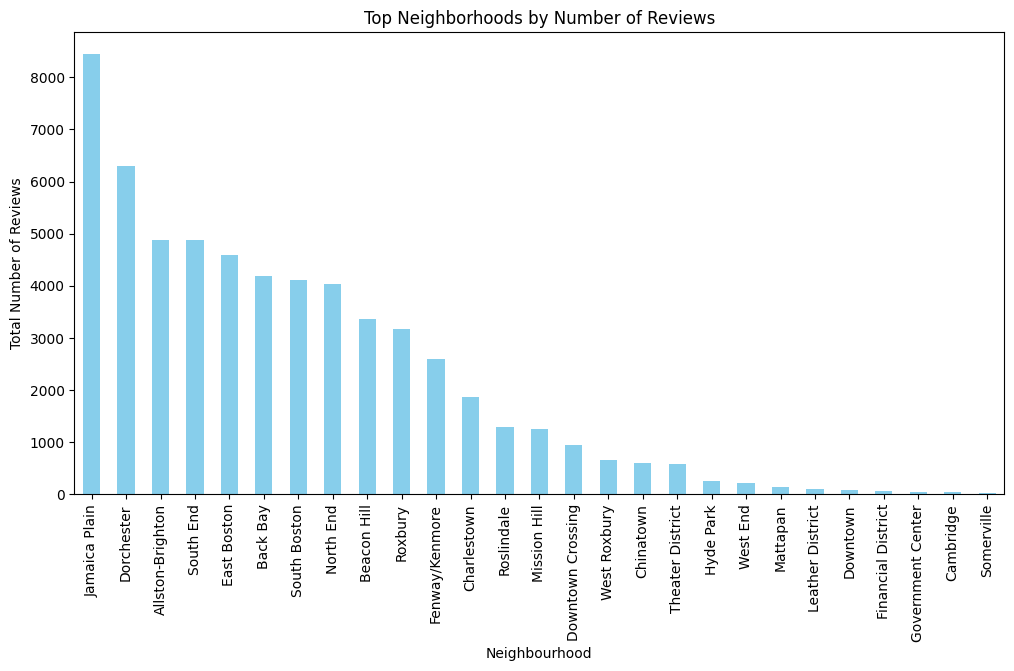

In [40]:
# Group by 'neighbourhood' and sum the 'number_of_reviews'
neighborhood_reviews = df_listings_cleaned.groupby('neighbourhood')['number_of_reviews'].sum()

# Sort in descending order
neighborhood_reviews = neighborhood_reviews.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
neighborhood_reviews.plot(kind='bar', color='skyblue')
plt.title('Top Neighborhoods by Number of Reviews')
plt.xlabel('Neighbourhood')
plt.ylabel('Total Number of Reviews')
plt.show()

## Findings for question 3
Q: What neighborhoods are the most popular?
- The Jamacia Plain, and Dorchester neighbourhoods are receiving the most reviews.
- Jamacia plain is by far the leading neighborhood with a difference of roughly 2000 more reviews than the next most reviewed neighbourhood (Dorchester).
- Additionally, Allston-Brighton and South End neighbourhoods are frequently reviewed as well.

#### 4. What is the average price for each neighbourhood?

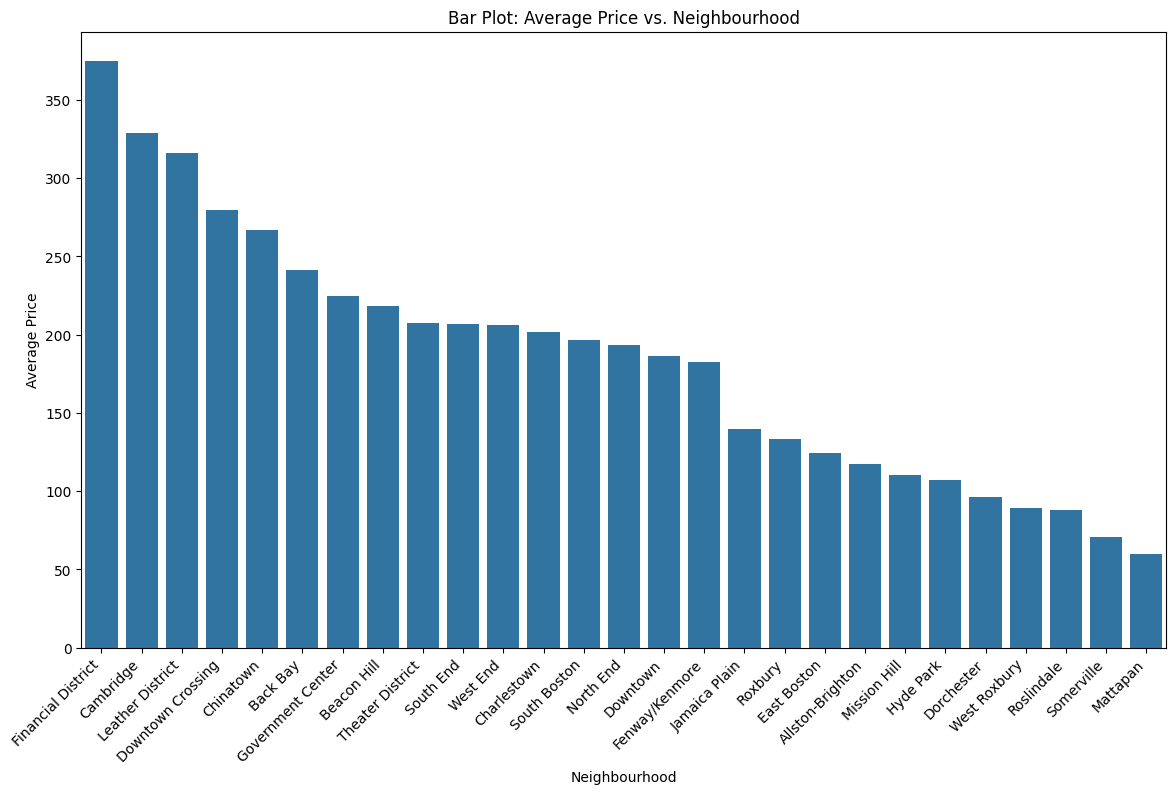

In [41]:
# Drop the missing price values
df_listings_cleaned_prices = df_listings_cleaned[df_listings_cleaned['price'].notna()]

# Convert price to a float
df_listings_cleaned_prices['price_as_decimal'] = df_listings_cleaned_prices['price'].apply(convert_to_decimal)

# Groupby neighbourhood and average the price
average_price_by_neighbourhood = df_listings_cleaned_prices.groupby('neighbourhood')['price_as_decimal'].mean().round(2).reset_index()

# Sort the DataFrame by 'price_as_decimal' in descending order
average_price_by_neighbourhood = average_price_by_neighbourhood.sort_values(by='price_as_decimal', ascending=False)

# Plot and show
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='price_as_decimal', data=average_price_by_neighbourhood, order=average_price_by_neighbourhood['neighbourhood'])
plt.title('Bar Plot: Average Price vs. Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

#### Findings for question 4
Q: What is the average price for each neighbourhood?
- The highest average price is slightly under \\$300 in the Financial District while Mattapan has the lowest average price slightly over \\$50. A roughly \\$250 difference between the highest and lowest average prices.
- The next 4 neighbourhoods are slightly lower than the leader which are Downtown Crossing, Cambridge, Chinatown, and Back Bay.

#### Which neighbourhoods offer the most value to renters/tenants? 
This draws a comparison against each listing's average price, their review scores ratings, and the most reviewed neighbourhoods in order to find which areas can offer the most value to renters.

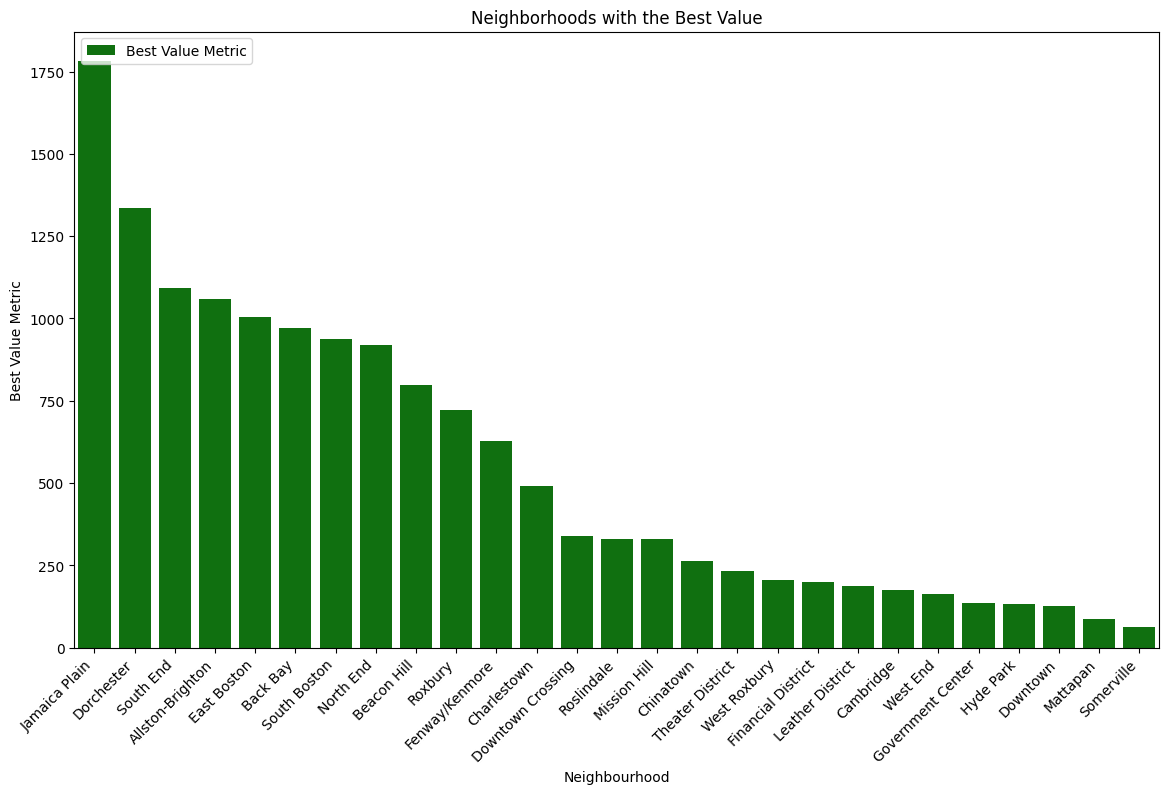

In [42]:
# Calculate average price, review scores, and number of reviews by neighborhood
average_price_by_neighbourhood = df_listings_cleaned_prices.groupby('neighbourhood')['price_as_decimal'].mean().round(2).reset_index()
average_review_scores_by_neighbourhood = df_listings_cleaned_prices.groupby('neighbourhood')['review_scores_rating'].mean().round(2).reset_index()
total_reviews_by_neighbourhood = df_listings_cleaned_prices.groupby('neighbourhood')['number_of_reviews'].sum().reset_index()

# Merge the DataFrames
merged_df = pd.merge(average_price_by_neighbourhood, average_review_scores_by_neighbourhood, on='neighbourhood', how='inner')
merged_df = pd.merge(merged_df, total_reviews_by_neighbourhood, on='neighbourhood', how='inner')

# Set weights for price, review scores, and number of reviews
price_weight = 0.4
review_scores_weight = 0.4
reviews_weight = 0.2

# Calculate a combined "best value metric" using a weighted sum
merged_df['best_value_metric'] = (
    (price_weight * merged_df['price_as_decimal']) +
    (review_scores_weight * merged_df['review_scores_rating']) +
    (reviews_weight * merged_df['number_of_reviews'])
)

# Sort by the combined best value metric in descending order to find the best value neighborhoods
best_value_neighborhoods = merged_df.sort_values(by='best_value_metric', ascending=False)

# Create bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood', y='best_value_metric', data=best_value_neighborhoods, color='green', label='Best Value Metric')

# Title and show
plt.title('Neighborhoods with the Best Value')
plt.xlabel('Neighbourhood')
plt.ylabel('Best Value Metric')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left')

plt.show()

#### Additional findings for questions 4 & 5
- This indicates that potential renters may find the best value for their dollar in the Jamaica Plain's neighbourhood followed by Dorchester and South End.

#### 5. Is the amount of short-term rental bookings increasing or declining?

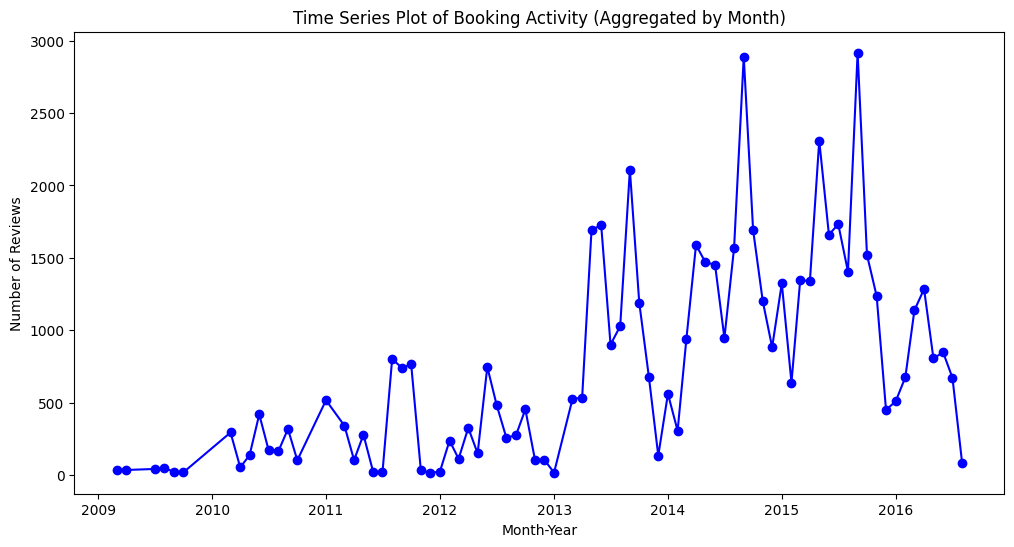

In [43]:
df_listings_cleaned['first_review'] = pd.to_datetime(df_listings_cleaned['first_review'])
df_listings_cleaned['month_year'] = df_listings_cleaned['first_review'].dt.to_period('M')
df_grouped = df_listings_cleaned.groupby('month_year')['number_of_reviews'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['month_year'].dt.to_timestamp(), df_grouped['number_of_reviews'], marker='o', linestyle='-', color='blue')
plt.title('Time Series Plot of Booking Activity (Aggregated by Month)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Reviews')
plt.show()

#### Findings for question 5
Q: Is the amount of short-term rental bookings increasing or declining?
- Looking at the number of first-time reviews and aggregating them by month we can see that the number of first-time reviews had drastically increased between 2013 to 2016.
- More recently the data suggests that they're declining heading into 2017 however during the winter months the number of reviews typically tend to decline before climbing again in the mid-year (summer months).